# The `Signal` class

The `Signal` class is a container based on the `np.array` storing besides the samples as function of time also a sample frequency. The class has many usefull methods making the life of an acoustician a bit easier. 
Furthermore, because its based on the `np.array`, all operations you would normally perform on a `np.array` can be done on a `Signal` as well. 

In [1]:
from acoustics import Signal
import numpy as np
%matplotlib inline
from IPython.display import Audio

A `Signal` takes two arguments, the first an array of samples, and the second a sample frequency.

In [2]:
s = Signal(np.random.randn(44100), fs=11025)

Alternatively, one of the alternative constructors can be used

In [3]:
s = Signal.from_wav('../data/recording.wav')

As said, an instance of `Signal` stores the sample frequency

In [4]:
s.fs

44100

The `Signal` class can handle multiple signals. Currently we have only one channel.

In [5]:
s.channels

1

The amount of samples in the signal can be retrieved in several ways. We can use the standard ways, `len(s)`, or `s.shape` but also the method `s.samples`

In [6]:
s.samples

863860

The recording is of an aircraft flyover as you can hear.

In [7]:
Audio(data=s, rate=s.fs)

Let's continue for now with analysing the recording.

We can start with looking at the spectrum. A narrowband power spectrum can be calculated using `s.power_spectrum()`

In [8]:
s.power_spectrum()

(array([  0.00000000e+00,   5.10499386e-02,   1.02099877e-01, ...,
          2.20498469e+04,   2.20498979e+04,   2.20499490e+04]),
 array([  4.47483544e-10,   9.42024541e-12,   8.67856146e-12, ...,
          5.43481045e-13,   7.52065129e-13,   4.11959645e-13]))

returning frequencies and powers. It's also possible to straightaway plot the power spectrum

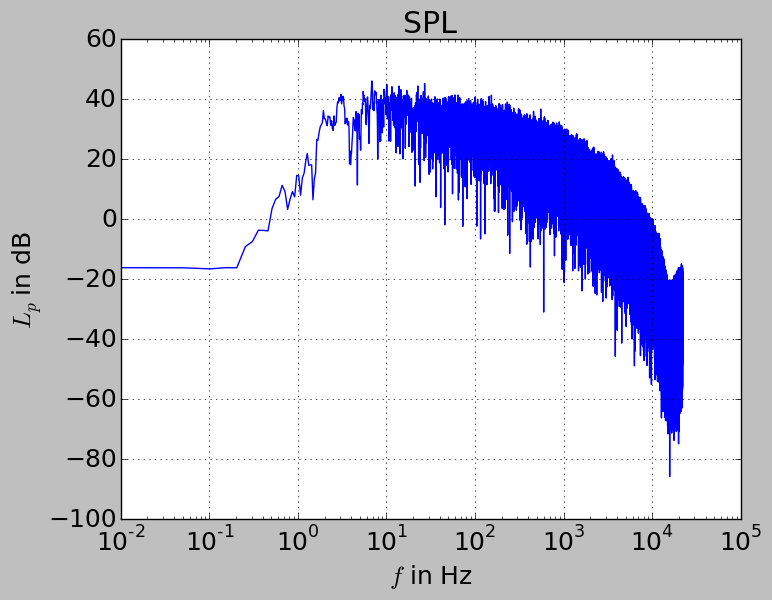

In [9]:
fig = s.plot_power_spectrum()

Another popular figure is the spectrogram

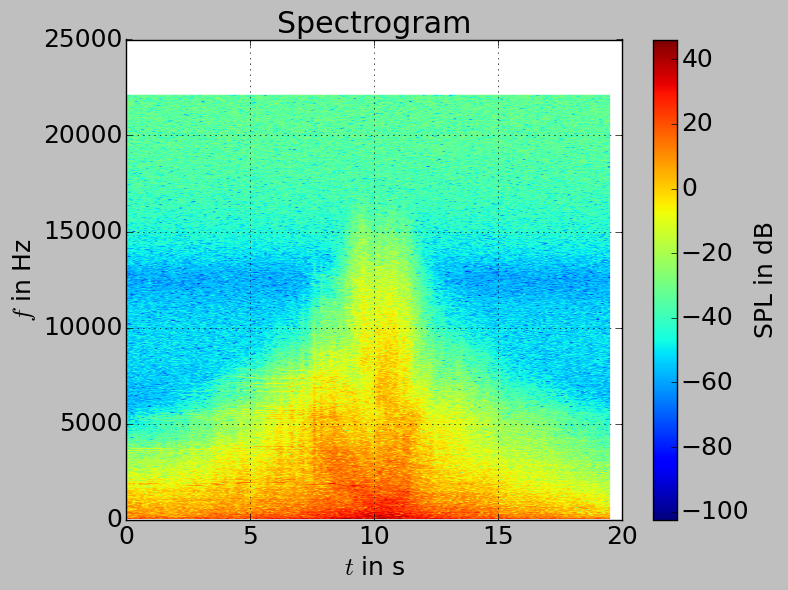

In [10]:
fig = s.spectrogram()

The methods shown so far are quite common operations, not specific to acoustics alone. But, the `Signal` class has some more acoustics-specific methods as well. For example, we can calculate the sound pressure level as function of time using `s.leq()` or instead plot the values 

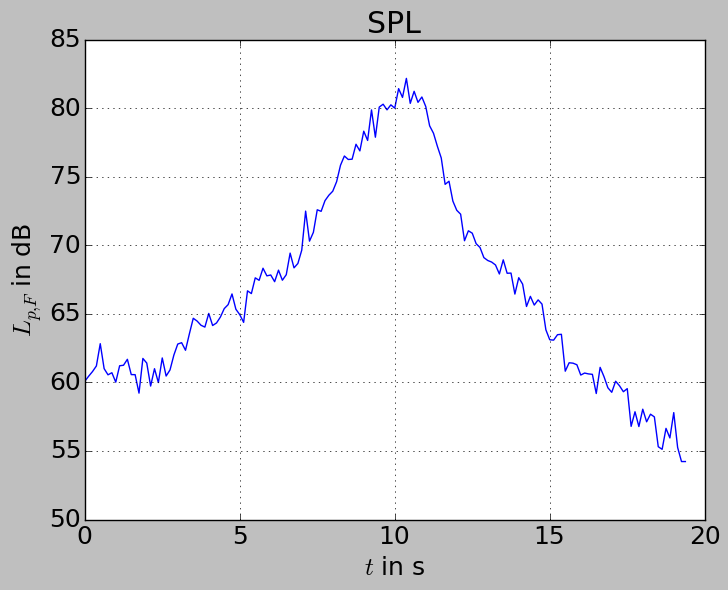

In [11]:
fig = s.plot_levels()

The label is the channel number, using zero-based numbering as is common in Python. We can also calculate and plot 1/1-octaves with respectively `s.octaves()` and `s.plot_octaves()`.

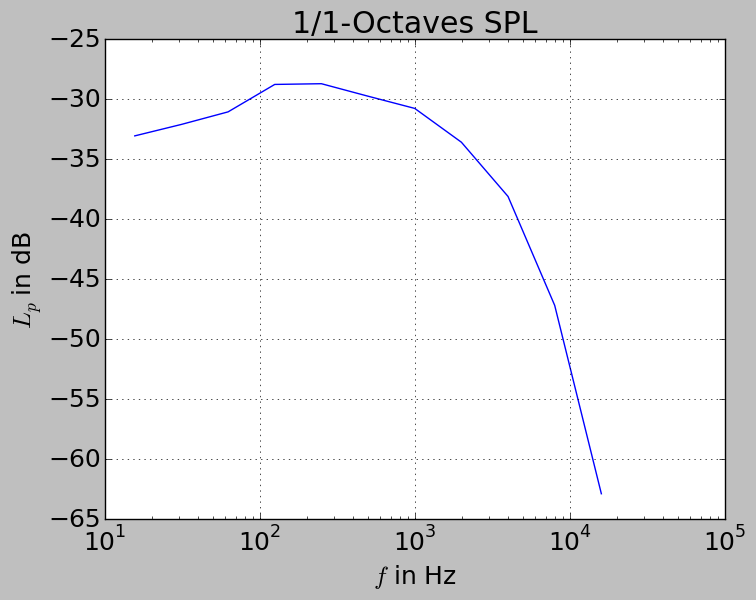

In [12]:
fig = s.plot_octaves()

Calculating or plotting 1/3-octaves is also possible.

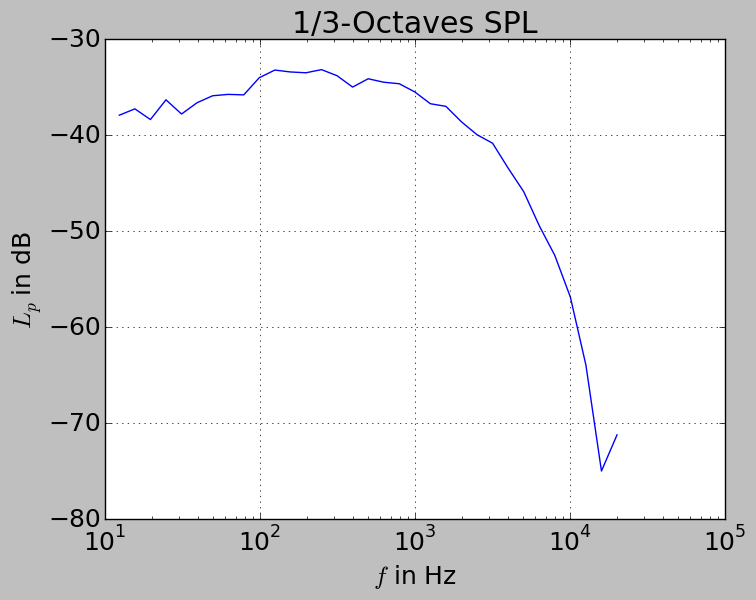

In [13]:
fig = s.plot_third_octaves()

Finally, a signal can be written to WAV format easily as well using `s.to_wav(filename)`.

In [14]:
s2 = Signal(np.vstack((s,s)), s.fs)